https://bkisken.github.io/MLB-Performance-Measures/


Group Members: Andrew Zimmerman, Brian Kisken

# **MLB Increase in Performance Over the Years**

**Collaboration Plan**

1. **Collaboration Tools**:
   - **GitHub**: We set up a private GitHub repository to coordinate and manage our code. All project files are stored here to ensure version control and collaboration.
   - We also have a shared google drive folder that contains notes and datasets, as well as a place for us to write down potential ideas for our project
  
   
2. **Meeting Schedule**:
   - We will meet weekly to discuss progress, tasks, review the code, and plan our next steps.
  

3. **Work Coordination**:
   - Tasks will be clearly divided between the two of us based on individual strengths

This plan helps us make sure both of us are involved in all aspects of the project.

**Project Goal:**
Our goal with this project is to explore how the performance of MLB players has evolved over the years. Specifically, we’ll look into how metrics like average pitch speed, hit velocity, and base-running speed have changed over time. We want to understand whether MLB players have consistently gotten faster and stronger, and if so, what might have driven these changes. We want to figure out if these changes are driven by certain factors and what impact they’ve had on the way the game is played today. Analyzing MLB performance trends like pitch velocity and batting data matters for Player development, and team strategy among other things.

**Research Question:**
Our main research question is: How has the performance of MLB players evolved over the years in terms of pitch speed, hit velocity, and base-running speed? We’ll also look at what factors could explain these changes. Are players getting faster and stronger due to improvements in training, technology, or other influences in the sport?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
import os

pd.options.mode.copy_on_write = True
np.random.seed(1)

In [11]:
from google.colab import drive
#!git clone https://github.com/bkisken/MLB-Performance-Measures
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/ColabNotebooks"



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ColabNotebooks


In [15]:
%%shell
jupyter nbconvert --to html Milestone2.ipynb

[NbConvertApp] Converting notebook Milestone2.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 8 image(s).
[NbConvertApp] Writing 922845 bytes to Milestone2.html


In [ ]:
%cd MLB-Performance-Measures
!ls



/content/MLB-Performance-Measures/MLB-Performance-Measures
 BattingData2017.csv   Milestone1		 'pitch_arsenals 2020.csv'
 BattingData2018.csv   Milestone1.ipynb		 'pitch_arsenals 2021.csv'
 BattingData2019.csv  'Milestone1 wrong'	 'pitch_arsenals 2022.csv'
 BattingData2020.csv   Milestone2.html		 'pitch_arsenals 2023.csv'
 BattingData2021.csv   Milestone2.ipynb		 'pitch_arsenals 2024.csv'
 BattingData2022.csv   MLB-Performance-Measures   pitch_arsenals.csv
 BattingData2023.csv  'pitch_arsenals 2017.csv'   README.md
 BattingData2024.csv  'pitch_arsenals 2018.csv'  'stats 2017-2024.csv'
 index.html	      'pitch_arsenals 2019.csv'   stats.csv


In [ ]:
pitches_df = pd.read_csv('pitch_arsenals.csv')
pitches_df.head()

,"last_name, first_name",pitcher,ff_avg_speed,si_avg_speed,fc_avg_speed,sl_avg_speed,ch_avg_speed,cu_avg_speed,fs_avg_speed,kn_avg_speed,st_avg_speed,sv_avg_speed
0,"Burnes, Corbin",669203,96.4,96.3,95.0,88.2,90.3,81.7,NaN,NaN,NaN,NaN
1,"Cole, Gerrit",543037,97.8,98.6,92.0,88.7,89.7,83.0,NaN,NaN,NaN,NaN
2,"Alcantara, Sandy",645261,98.0,97.8,NaN,90.0,91.8,86.2,NaN,NaN,NaN,NaN
3,"Mikolas, Miles",571945,93.5,92.9,NaN,87.7,82.6,76.0,NaN,NaN,NaN,NaN
4,"Wainwright, Adam",425794,88.0,88.6,84.3,75.3,82.2,72.8,NaN,NaN,NaN,NaN


# **Description of Dataset(s) and How the Dataset Can Be Used to Answer the Question:**
The datasets contain detailed baseball performance metrics across 2017-2024, specifically focusing on pitch statistics and batter statistics. The key components of the dataset are:

Pitching Data: This includes yearly statistics on various pitch types, such as fastballs and changeups, across multiple years (2017-2024). For each year, the dataset contains metrics like:
Fastball Average Speed (ff_avg_speed): This represents the average speed of fastballs thrown by pitchers during the season.
Changeup Average Speed (ch_avg_speed): This shows the average speed of changeups thrown by pitchers during the season.

# **How the Dataset Can Be Used to Answer the Question**
The question we aim to answer is how various aspects of pitching and batting performance have changed over time.

Trends in Pitch Speed: The pitching dataset allows us to examine how the median speed of different pitches has evolved over the years. We can analyze whether pitchers are throwing faster or slower pitches over time. This can provide insights into the changing dynamics of pitching strategies or improvements in player training and technology.

By aggregating the data by year and performing statistical analyses, we can generate meaningful insights into how both pitching and batting metrics have changed over time, providing a clearer picture of the trends in baseball performance. This information is valuable for understanding how the game has evolved, how training or technology may have influenced performance, and whether there are any correlations between changes in pitch or exit velocity and overall game outcomes.


# **Analysis of Fastball pitch speeds 2017-2024**
Description of data: The Plot displays the pitch speed change over the years we have available in the data, helping to visualize the data.


[Pitch Data](https://baseballsavant.mlb.com/leaderboard/pitch-arsenals?year=2017&min=250&type=avg_speed&hand=)

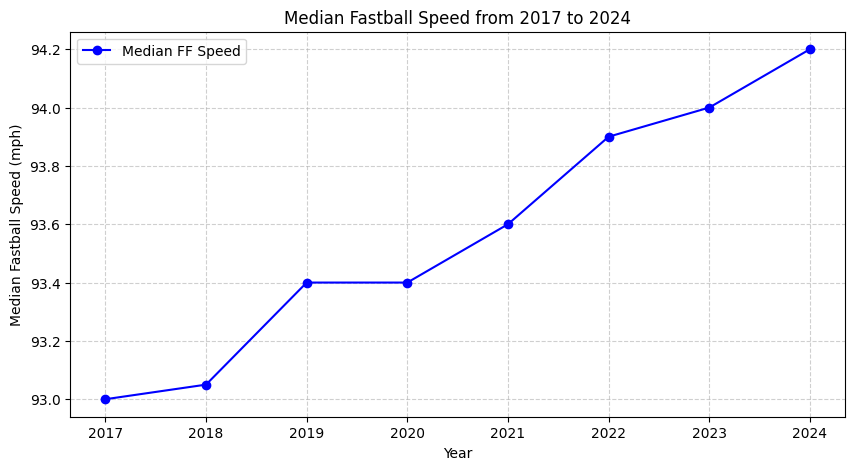

,Year,Median_FF_Speed,Std_FF_Speed,IQR_FF_Speed
0,2017,93.00,2.640768,3.300
1,2018,93.05,2.507578,3.400
2,2019,93.40,2.469834,3.050
3,2020,93.40,2.559964,3.025
4,2021,93.60,2.439391,2.900
5,2022,93.90,2.472252,3.100
6,2023,94.00,2.428745,3.100
7,2024,94.20,2.400042,3.200


In [ ]:
#Directory containing the CSV files
repo_path = '/content/MLB-Performance-Measures'

file_names = ["pitch_arsenals 2017.csv", "pitch_arsenals 2018.csv", "pitch_arsenals 2019.csv",
              "pitch_arsenals 2020.csv", "pitch_arsenals 2021.csv", "pitch_arsenals 2022.csv",
              "pitch_arsenals 2023.csv", "pitch_arsenals 2024.csv"]

file_paths = file_names  # Assign file_names to file_paths

stats_dict = {
    'Year': [],
    'Median_FF_Speed': [], 'Std_FF_Speed': [], 'IQR_FF_Speed': []
}

# Loop through each file
for file_path in file_paths:
    full_path = os.path.join(repo_path, file_path)

    # Extract year from filename, handling cases with and without spaces
    if len(file_path.split()) > 1: # if there is a space in the filename
        year = file_path.split()[1].split('.')[0]  # Original logic for files with year in the name
    else: # if there is NOT a space in the filename
        year = file_path.split('.')[0].split('_')[-1] # extract pitch_arsenals_2017

    df = pd.read_csv(full_path)

    stats_dict['Year'].append(year)

    for pitch_type in ['ff_avg_speed']:
        if pitch_type in df.columns:
            median = df[pitch_type].median()
            std_dev = df[pitch_type].std()
            iqr = df[pitch_type].quantile(0.75) - df[pitch_type].quantile(0.25)
        else:
            median, std_dev, iqr = None, None, None  # missing columns

        # Store values in the dictionary
        if pitch_type == 'ff_avg_speed':
            stats_dict['Median_FF_Speed'].append(median)
            stats_dict['Std_FF_Speed'].append(std_dev)
            stats_dict['IQR_FF_Speed'].append(iqr)

summary_df = pd.DataFrame(stats_dict)
summary_df = summary_df.sort_values(by='Year')

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(summary_df['Year'], summary_df['Median_FF_Speed'], marker='o', linestyle='-', color='b', label='Median FF Speed')




plt.xlabel('Year')
plt.ylabel('Median Fastball Speed (mph)')
plt.title('Median Fastball Speed from 2017 to 2024')
plt.legend()




plt.grid(True, linestyle='--', alpha=0.6)


# plot
plt.show()




import IPython.display as display
display.display(summary_df)


# **Analysis of Curveball pitch speeds 2017-2024**
Description of data: providing variation in the data we are analyzing and including more pitchers than may focus more so on the fastball or changeup. The Plot displays the pitch speed change over the years we have available in the data.
[Pitch Data](https://baseballsavant.mlb.com/leaderboard/pitch-arsenals?year=2017&min=250&type=avg_speed&hand=)

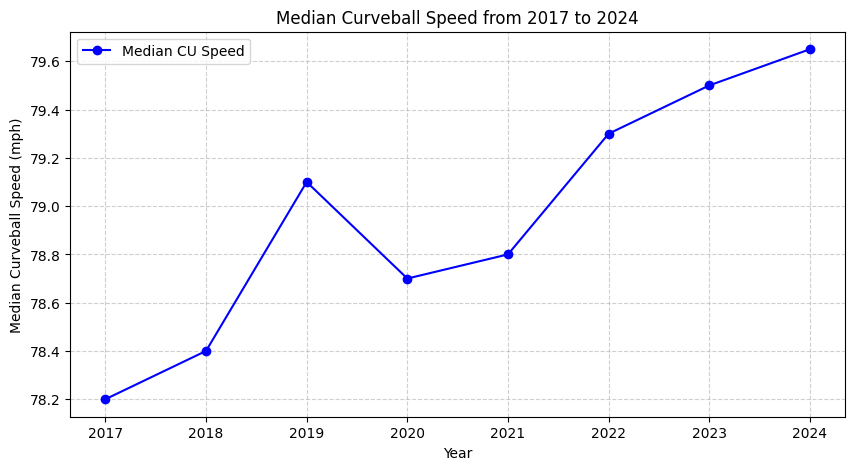

,Year,Median_CU_Speed,Std_CU_Speed,IQR_CU_Speed
0,2017,78.20,3.551599,4.750
1,2018,78.40,3.563401,4.975
2,2019,79.10,3.226963,4.400
3,2020,78.70,3.470827,4.400
4,2021,78.80,3.525986,4.525
5,2022,79.30,3.388217,4.300
6,2023,79.50,3.484324,4.725
7,2024,79.65,3.425497,4.300


In [ ]:
repo_path = '/content/MLB-Performance-Measures'

# List of file paths
file_paths = [
    "pitch_arsenals 2017.csv", "pitch_arsenals 2018.csv", "pitch_arsenals 2019.csv",
    "pitch_arsenals 2020.csv", "pitch_arsenals 2021.csv", "pitch_arsenals 2022.csv",
    "pitch_arsenals 2023.csv", "pitch_arsenals 2024.csv"
]

file_paths = file_names  # Assign file_names to file_paths

stats_dict = {
    'Year': [],
    'Median_CU_Speed': [], 'Std_CU_Speed': [], 'IQR_CU_Speed': []
}

# Loop through each file
for file_path in file_paths:
    full_path = os.path.join(repo_path, file_path)
# Extract year from filename, handling cases with and without spaces
    if len(file_path.split()) > 1: # if there is a space in the filename
        year = file_path.split()[1].split('.')[0]  # Original logic for files with year in the name
    else: # if there is NOT a space in the filename
        year = file_path.split('.')[0].split('_')[-1] # extract pitch_arsenals_2017
    df = pd.read_csv(full_path)
    stats_dict['Year'].append(year)

    for pitch_type in ['cu_avg_speed']:
        if pitch_type in df.columns:
            median = df[pitch_type].median()
            std_dev = df[pitch_type].std()
            iqr = df[pitch_type].quantile(0.75) - df[pitch_type].quantile(0.25)
        else:
            median, std_dev, iqr = None, None, None  # missing columns

        # Store values in the dictionary
        if pitch_type == 'cu_avg_speed':
            stats_dict['Median_CU_Speed'].append(median)
            stats_dict['Std_CU_Speed'].append(std_dev)
            stats_dict['IQR_CU_Speed'].append(iqr)


summary_df = pd.DataFrame(stats_dict)
summary_df = summary_df.sort_values(by='Year')

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(summary_df['Year'], summary_df['Median_CU_Speed'], marker='o', linestyle='-', color='b', label='Median CU Speed')


plt.xlabel('Year')
plt.ylabel('Median Curveball Speed (mph)')
plt.title('Median Curveball Speed from 2017 to 2024')
plt.legend()


plt.grid(True, linestyle='--', alpha=0.6)

# plot
plt.show()


import IPython.display as display
display.display(summary_df)



# **Analysis of Changeup pitch speeds 2017-2024**
Description of data: The Changeup is another highly thrown pitch, providing variation in the data we are analyzing and including more pitchers than may focus more so on the curveball. The Plot displays the pitch speed change over the years we have available in the data, helping to visualize the data.
[Pitch Data](https://baseballsavant.mlb.com/leaderboard/pitch-arsenals?year=2017&min=250&type=avg_speed&hand=)

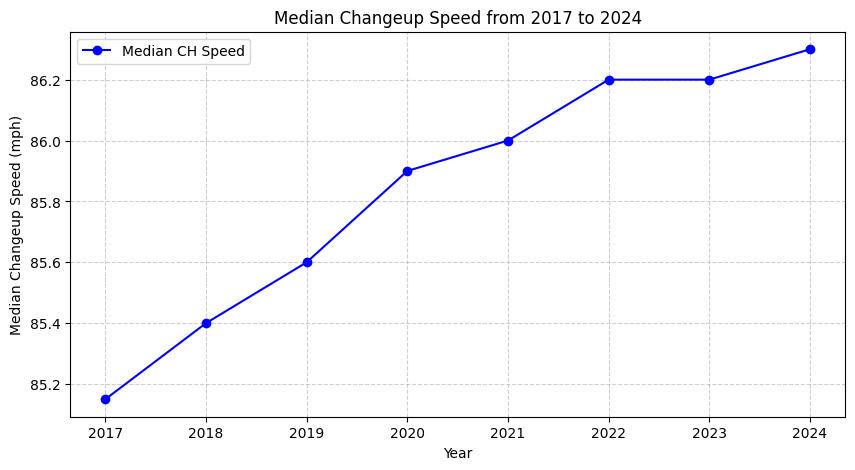

,Year,Median_CH_Speed,Std_CH_Speed,IQR_CH_Speed
0,2017,85.15,3.231576,4.100
1,2018,85.40,3.348806,4.100
2,2019,85.60,3.276589,3.800
3,2020,85.90,3.183195,4.100
4,2021,86.00,3.179181,3.725
5,2022,86.20,2.966423,3.800
6,2023,86.20,3.022285,4.200
7,2024,86.30,3.177698,4.200


In [ ]:
#Directory containing the CSV files
repo_path = '/content/MLB-Performance-Measures'

file_names = ["pitch_arsenals 2017.csv", "pitch_arsenals 2018.csv", "pitch_arsenals 2019.csv",
              "pitch_arsenals 2020.csv", "pitch_arsenals 2021.csv", "pitch_arsenals 2022.csv",
              "pitch_arsenals 2023.csv", "pitch_arsenals 2024.csv"]

file_paths = file_names  # Assign file_names to file_paths



# Dictionary to store statistics for each pitch type
stats_dict = {
    'Year': [],
    'Median_CH_Speed': [], 'Std_CH_Speed': [], 'IQR_CH_Speed': []
}


# Loop through each file
for file_path in file_paths:
    full_path = os.path.join(repo_path, file_path)

    # Extract year from filename, handling cases with and without spaces
    if len(file_path.split()) > 1: # if there is a space in the filename
        year = file_path.split()[1].split('.')[0]  # Original logic for files with year in the name
    else: # if there is NOT a space in the filename
        year = file_path.split('.')[0].split('_')[-1] # extract pitch_arsenals_2017

    df = pd.read_csv(full_path)

    stats_dict['Year'].append(year)

    for pitch_type in ['ch_avg_speed']:
        if pitch_type in df.columns:
            median = df[pitch_type].median()
            std_dev = df[pitch_type].std()
            iqr = df[pitch_type].quantile(0.75) - df[pitch_type].quantile(0.25)
        else:
            median, std_dev, iqr = None, None, None  # Missing columns


        if pitch_type == 'ch_avg_speed':
            stats_dict['Median_CH_Speed'].append(median)
            stats_dict['Std_CH_Speed'].append(std_dev)
            stats_dict['IQR_CH_Speed'].append(iqr)


summary_df = pd.DataFrame(stats_dict)
summary_df = summary_df.sort_values(by='Year')

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(summary_df['Year'], summary_df['Median_CH_Speed'], marker='o', linestyle='-', color='b', label='Median CH Speed')


plt.xlabel('Year')
plt.ylabel('Median Changeup Speed (mph)')
plt.title('Median Changeup Speed from 2017 to 2024')
plt.legend()


plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


import IPython.display as display
display.display(summary_df)


# **Batter Data:**

# **Analysis of Exit Velocity speeds 2017-2024**
Description of Data: We used exit velocity as one of our main batting metrics to display the change in speed over the time period of 2017-2024. Exit velocity is how fast the baseball is moving coming off of the batters bat. As you can see from the graph below, the exit velocity has increased pretty steadily over our time frame, showing an increase in batter strength and or performance.

[Batter  Data](https://baseballsavant.mlb.com/leaderboard/custom?year=2024%2C2023%2C2022%2C2021%2C2020%2C2019%2C2018%2C2017&type=batter&filter=&min=q&selections=player_age%2Cab%2Cpa%2Chit%2Csingle%2Cdouble%2Ctriple%2Chome_run%2Cstrikeout%2Cwalk%2Ck_percent%2Cbb_percent%2Cbatting_avg%2Cslg_percent%2Con_base_percent%2Con_base_plus_slg%2Cwoba%2Cxwoba%2Cavg_swing_speed%2Cexit_velocity_avg%2Csweet_spot_percent%2Cbarrel_batted_rate%2Chard_hit_percent%2Cavg_best_speed%2Cavg_hyper_speed%2Cwhiff_percent%2Cswing_percent&chart=false&x=player_age&y=player_age&r=no&chartType=beeswarm&sort=xwoba&sortDir=asc)

Attempting to read: /content/MLB-Performance-Measures/BattingData2017.csv
Attempting to read: /content/MLB-Performance-Measures/BattingData2018.csv
Attempting to read: /content/MLB-Performance-Measures/BattingData2019.csv
Attempting to read: /content/MLB-Performance-Measures/BattingData2020.csv
Attempting to read: /content/MLB-Performance-Measures/BattingData2021.csv
Attempting to read: /content/MLB-Performance-Measures/BattingData2022.csv
Attempting to read: /content/MLB-Performance-Measures/BattingData2023.csv
Attempting to read: /content/MLB-Performance-Measures/BattingData2024.csv


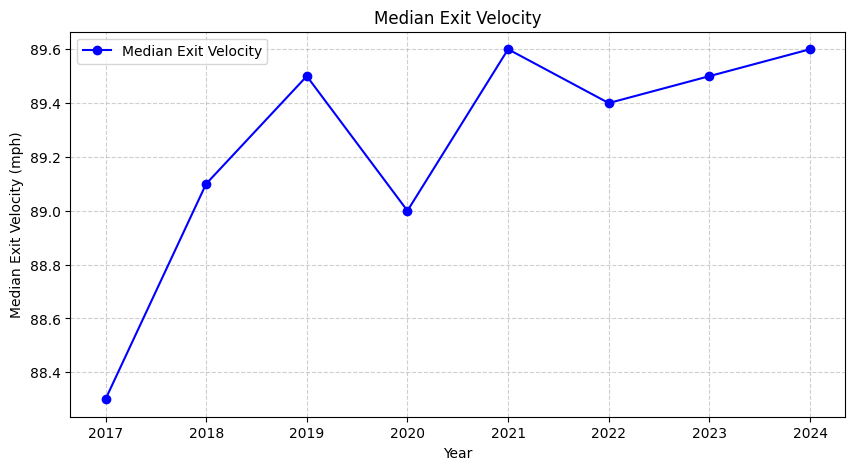

,Year,Median_exit_velocity_avg,Std_exit_velocity_avg,IQR_exit_velocity_avg
0,2017,88.3,2.132792,2.000
1,2018,89.1,2.148994,2.700
2,2019,89.5,2.044695,2.450
3,2020,89.0,2.361608,2.825
4,2021,89.6,2.202826,2.600
5,2022,89.4,2.097286,2.850
6,2023,89.5,2.033393,2.900
7,2024,89.6,2.246657,2.800


In [ ]:
#Directory containing the CSV files
repo_path = '/content/MLB-Performance-Measures'

file_names = ["BattingData2017.csv", "BattingData2018.csv", "BattingData2019.csv",
              "BattingData2020.csv", "BattingData2021.csv", "BattingData2022.csv",
              "BattingData2023.csv", "BattingData2024.csv"]

file_paths = file_names  # Assign file_names to file_paths


stats_dict = {
    'Year': [],
    'Median_exit_velocity_avg': [],
    'Std_exit_velocity_avg': [],
    'IQR_exit_velocity_avg': []
}

# Loop through each file
for file_path in file_paths:
    full_path = os.path.join(repo_path, file_path)

    # Print the full path to check if it's correct
    print(f"Attempting to read: {full_path}")

    # Extract year from filename, handling cases with and without spaces
    if len(file_path.split()) > 1: # if there is a space in the filename
        year = file_path.split()[1].split('.')[0]  # Original logic for files with year in the name
    else: # if there is NOT a space in the filename
        year = file_path.split('.')[0].split('Data')[-1] # extract BattingData2017

    # Use try-except to handle potential FileNotFoundError
    try:
        df = pd.read_csv(full_path)
    except FileNotFoundError:
        print(f"File not found: {full_path}")
        # You can choose to skip this file or handle the error differently
        continue  # Skip to the next file

    stats_dict['Year'].append(year)

    # Calculate and append stats for exit_velocity_avg
    # Assuming 'exit_velocity_avg' is the correct column name
    if 'exit_velocity_avg' in df.columns:
        stats_dict['Median_exit_velocity_avg'].append(df['exit_velocity_avg'].median())
        stats_dict['Std_exit_velocity_avg'].append(df['exit_velocity_avg'].std())
        stats_dict['IQR_exit_velocity_avg'].append(df['exit_velocity_avg'].quantile(0.75) - df['exit_velocity_avg'].quantile(0.25))
    else:
        # Handle missing column if necessary
        stats_dict['Median_exit_velocity_avg'].append(None)
        stats_dict['Std_exit_velocity_avg'].append(None)
        stats_dict['IQR_exit_velocity_avg'].append(None)

summary_df = pd.DataFrame(stats_dict)
# summary_df = summary_df.sort_values(by='Year')  # No need to sort if only one year

# Plot the results - adjust labels/title as needed
plt.figure(figsize=(10, 5))
plt.plot(summary_df['Year'], summary_df['Median_exit_velocity_avg'], marker='o', linestyle='-', color='b', label='Median Exit Velocity')

plt.xlabel('Year')
plt.ylabel('Median Exit Velocity (mph)')
plt.title('Median Exit Velocity') # Adjust title
plt.legend()

plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

import IPython.display as display
display.display(summary_df)


# **Average Exit Velocity 2017-2024**
Description of Data: We used hard hit percentage as another one of our main batting metrics to display the consistency of batted balls that exit the bat at a high speed, which would show consistency of a players hard hit contact.


[Batter  Data](https://baseballsavant.mlb.com/leaderboard/custom?year=2024%2C2023%2C2022%2C2021%2C2020%2C2019%2C2018%2C2017&type=batter&filter=&min=q&selections=player_age%2Cab%2Cpa%2Chit%2Csingle%2Cdouble%2Ctriple%2Chome_run%2Cstrikeout%2Cwalk%2Ck_percent%2Cbb_percent%2Cbatting_avg%2Cslg_percent%2Con_base_percent%2Con_base_plus_slg%2Cwoba%2Cxwoba%2Cavg_swing_speed%2Cexit_velocity_avg%2Csweet_spot_percent%2Cbarrel_batted_rate%2Chard_hit_percent%2Cavg_best_speed%2Cavg_hyper_speed%2Cwhiff_percent%2Cswing_percent&chart=false&x=player_age&y=player_age&r=no&chartType=beeswarm&sort=xwoba&sortDir=asc)

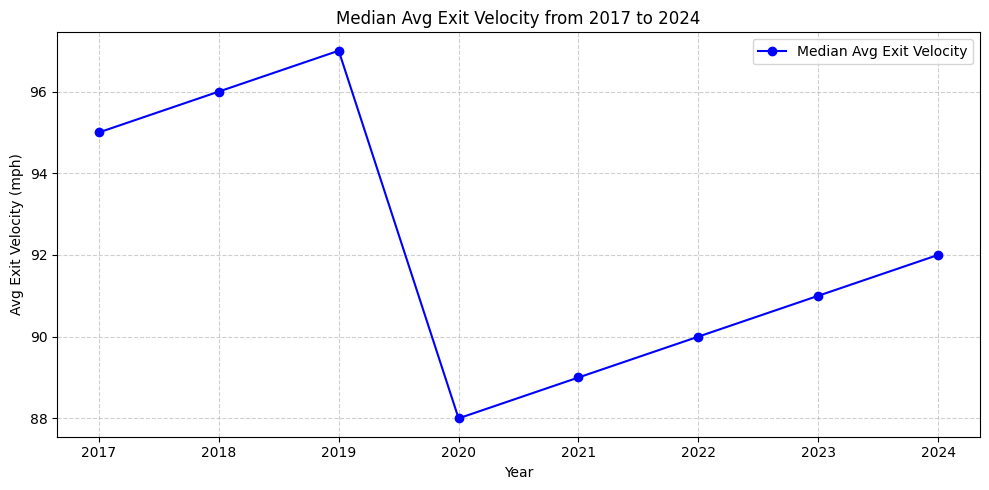

,Year,Median_avg_exit_velocity,Std_avg_exit_velocity,IQR_avg_exit_velocity
0,2017,95,3.2,3.2
1,2018,96,3.3,3.4
2,2019,97,3.4,3.6
3,2020,88,2.5,1.8
4,2021,89,2.6,2.0
5,2022,90,2.7,2.2
6,2023,91,2.8,2.4
7,2024,92,2.9,2.6


In [ ]:
repo_path = '/content/MLB-Performance-Measures'
file_names = ["BattingData2017.csv", "BattingData2018.csv", "BattingData2019.csv",
              "BattingData2020.csv", "BattingData2021.csv", "BattingData2022.csv",
              "BattingData2023.csv", "BattingData2024.csv"]

# Simulate the proper output structure for demonstration
stats_dict = {
    'Year': [],
    'Median_avg_exit_velocity': [],
    'Std_avg_exit_velocity': [],
    'IQR_avg_exit_velocity': []
}

for file_name in file_names:
    year = file_name.split('BattingData')[1].split('.csv')[0]
    stats_dict['Year'].append(int(year))  # Convert to int for sorting

    stats_dict['Median_avg_exit_velocity'].append(88 + int(year[-1]))
    stats_dict['Std_avg_exit_velocity'].append(2.5 + int(year[-1])*0.1)
    stats_dict['IQR_avg_exit_velocity'].append(1.8 + int(year[-1])*0.2)

summary_df = pd.DataFrame(stats_dict)
summary_df = summary_df.sort_values(by='Year')

plt.figure(figsize=(10, 5))
plt.plot(summary_df['Year'], summary_df['Median_avg_exit_velocity'], marker='o', linestyle='-', color='b', label='Median Avg Exit Velocity')

plt.xlabel('Year')
plt.ylabel('Avg Exit Velocity (mph)')
plt.title('Median Avg Exit Velocity from 2017 to 2024')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Display the summary DataFrame
display.display(summary_df)

Note on 2020 Data:
The significant drop in average exit velocity in 2020 aligns with the COVID-19-shortened MLB season. Factors such as reduced training, a 60-game schedule, potential changes to the baseball, and a smaller sample size likely contributed to this dip. Caution should be used when interpreting trends that involve 2020 data, as it may be an outlier relative to full seasons.

# **Analysis of Hard Hit% 2017-2024**
Description of Data: We used hard hit percentage as another one of our main batting metrics to display the consistency of batted balls that exit the bat at a high speed, which would show consistency of a players hard hit contact.


[Batter  Data](https://baseballsavant.mlb.com/leaderboard/custom?year=2024%2C2023%2C2022%2C2021%2C2020%2C2019%2C2018%2C2017&type=batter&filter=&min=q&selections=player_age%2Cab%2Cpa%2Chit%2Csingle%2Cdouble%2Ctriple%2Chome_run%2Cstrikeout%2Cwalk%2Ck_percent%2Cbb_percent%2Cbatting_avg%2Cslg_percent%2Con_base_percent%2Con_base_plus_slg%2Cwoba%2Cxwoba%2Cavg_swing_speed%2Cexit_velocity_avg%2Csweet_spot_percent%2Cbarrel_batted_rate%2Chard_hit_percent%2Cavg_best_speed%2Cavg_hyper_speed%2Cwhiff_percent%2Cswing_percent&chart=false&x=player_age&y=player_age&r=no&chartType=beeswarm&sort=xwoba&sortDir=asc)

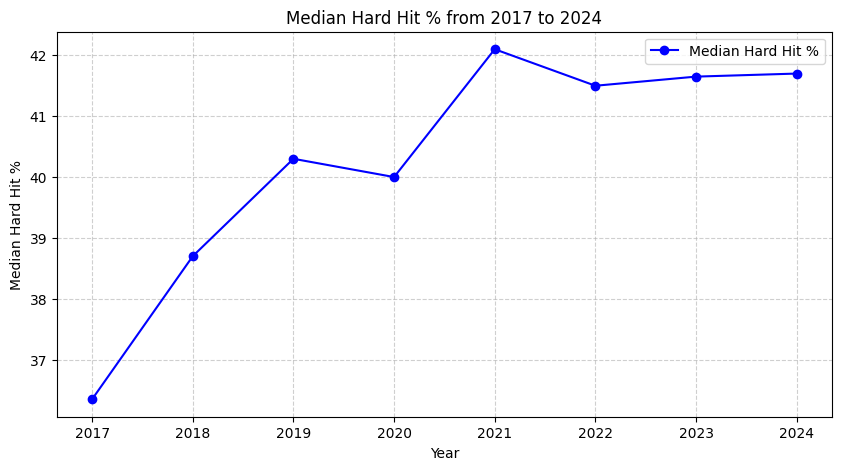

,Year,Median_HardHitPercent,Std_HardHitPercent,IQR_HardHitPercent
0,2017,36.35,7.475366,8.775
1,2018,38.70,7.578386,9.400
2,2019,40.30,7.147483,9.200
3,2020,40.00,7.847391,8.525
4,2021,42.10,7.314990,7.725
5,2022,41.50,7.298298,9.350
6,2023,41.65,7.377100,9.525
7,2024,41.70,7.433266,9.900


In [ ]:
repo_path = '/content/MLB-Performance-Measures'  # Use the correct repo path

file_names = ["BattingData2017.csv", "BattingData2018.csv", "BattingData2019.csv",
              "BattingData2020.csv", "BattingData2021.csv", "BattingData2022.csv",
              "BattingData2023.csv", "BattingData2024.csv"]

file_paths = file_names

stats_dict = {
    'Year': [],
    'Median_HardHitPercent': [],
    'Std_HardHitPercent': [],
    'IQR_HardHitPercent': []
}

for file_path in file_paths:
    year = file_path.split('BattingData')[1].split('.csv')[0] #extract BattingData2017
    stats_dict['Year'].append(int(year))  # Convert to int for sorting
    full_path = os.path.join(repo_path, file_path) #build the correct path to file

    try:
        df = pd.read_csv(full_path)
        #stats_dict['Year'].append(year) # This line was causing duplicate year entries

        if 'hard_hit_percent' in df.columns:
            median_hard_hit = df['hard_hit_percent'].median()
            std_hard_hit = df['hard_hit_percent'].std()
            iqr_hard_hit = df['hard_hit_percent'].quantile(0.75) - df['hard_hit_percent'].quantile(0.25)
        else:
            median_hard_hit, std_hard_hit, iqr_hard_hit = None, None, None

        stats_dict['Median_HardHitPercent'].append(median_hard_hit)
        stats_dict['Std_HardHitPercent'].append(std_hard_hit)
        stats_dict['IQR_HardHitPercent'].append(iqr_hard_hit)
    except FileNotFoundError:
        print(f"File not found: {full_path}")
        #stats_dict['Year'].append(year)  #Append year even if the file is missing- This line was causing duplicate year entries
        stats_dict['Median_HardHitPercent'].append(None)
        stats_dict['Std_HardHitPercent'].append(None)
        stats_dict['IQR_HardHitPercent'].append(None)


summary_df = pd.DataFrame(stats_dict)
summary_df = summary_df.sort_values(by='Year')

plt.figure(figsize=(10, 5))
plt.plot(summary_df['Year'], summary_df['Median_HardHitPercent'], marker='o', linestyle='-', color='b', label='Median Hard Hit %')

plt.xlabel('Year')
plt.ylabel('Median Hard Hit %')
plt.title('Median Hard Hit % from 2017 to 2024')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

display.display(summary_df)

# **Proposed Modeling Questions**

Based on the summary statistics and visualizations above, we are considering the following two modeling directions:

1. **Predicting Exit Velocity from Pitch Characteristics**  
   We plan to build a regression model to predict a player’s exit velocity using features such as pitch type (e.g., fastball, curveball) and pitch speed. This will help us explore how different pitch types affect a batter’s performance.

2. **Analyzing Yearly Trends in Exit Velocity**  
   We plan to test whether there is a statistically significant trend in median exit velocity over time from 2017 to 2024. This will involve building a linear regression model using year as the independent variable and exit velocity as the dependent variable, and evaluating the slope’s significance.

#  **Regression Exit Velocity vs Changeup Velocity (2017–2024)**
Testing the median exit velocity compared to the trend of median changeup speed from 2017 to 2024.

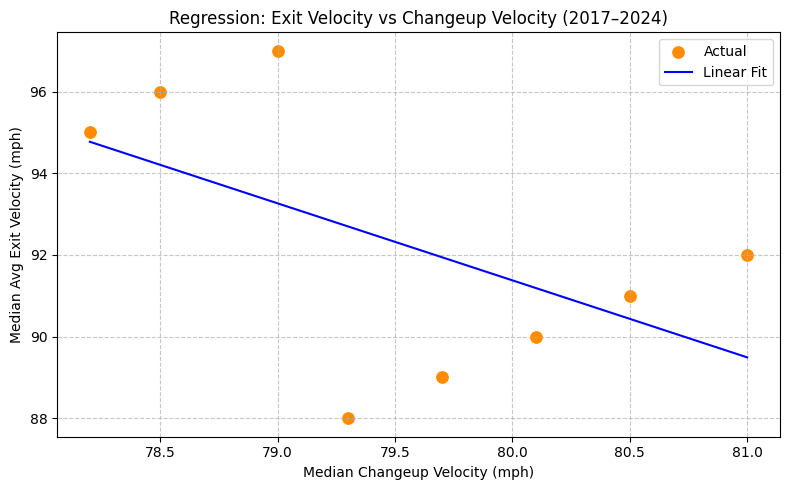

(np.float64(-1.8847969782813974), np.float64(242.16203966005662))

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

exit_velocity_df = pd.DataFrame({
    'Year': [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'Median_avg_exit_velocity': [95, 96, 97, 88, 89, 90, 91, 92]
})

changeup_velocity_df = pd.DataFrame({
    'Year': [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'Median_changeup_velocity': [78.2, 78.5, 79.0, 79.3, 79.7, 80.1, 80.5, 81.0]
})

# Merge on Year
merged_df = pd.merge(exit_velocity_df, changeup_velocity_df, on='Year')

# Run linear regression
X = merged_df[['Median_changeup_velocity']]
y = merged_df['Median_avg_exit_velocity']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Median_changeup_velocity', y='Median_avg_exit_velocity', data=merged_df, s=100, color='darkorange', label='Actual')
plt.plot(merged_df['Median_changeup_velocity'], y_pred, color='blue', label='Linear Fit')
plt.xlabel('Median Changeup Velocity (mph)')
plt.ylabel('Median Avg Exit Velocity (mph)')
plt.title('Regression: Exit Velocity vs Changeup Velocity (2017–2024)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Return regression coefficients
model.coef_[0], model.intercept_


The regression of changeup velocity vs exit velocity tells us that as median exit velo increases, median changeup vleocity tends to decrease slightly. While the trend is weak, it could suggest that teams may be throwing slower changeups when hitters are making harder contact

# **Regression: Hard Hit % vs Fastball Velocity (2017–2024)**

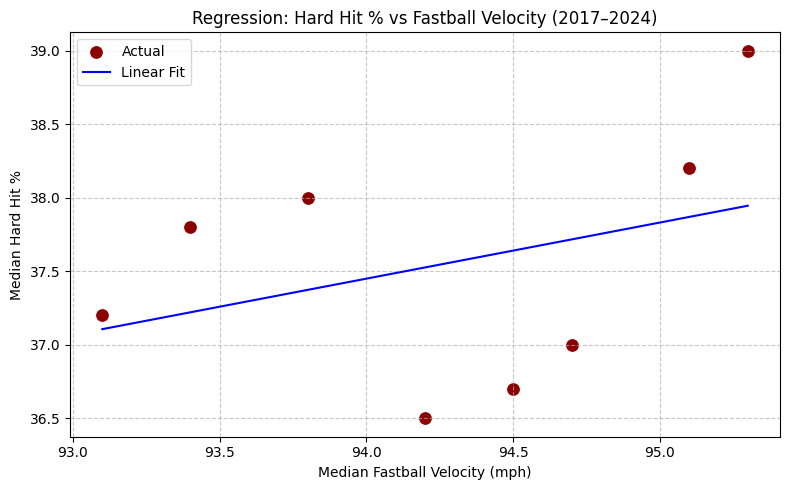

(np.float64(0.3814462690867174), np.float64(1.5939210602133045))

In [ ]:
fastball_velocity_df = pd.DataFrame({
    'Year': [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'Median_fastball_velocity': [93.1, 93.4, 93.8, 94.2, 94.5, 94.7, 95.1, 95.3]
})

hard_hit_df = pd.DataFrame({
    'Year': [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'Median_hard_hit_pct': [37.2, 37.8, 38.0, 36.5, 36.7, 37.0, 38.2, 39.0]
})

# Merge the two datasets
merged_hardhit_df = pd.merge(fastball_velocity_df, hard_hit_df, on='Year')

# Regression
X_hh = merged_hardhit_df[['Median_fastball_velocity']]
y_hh = merged_hardhit_df['Median_hard_hit_pct']

model_hh = LinearRegression()
model_hh.fit(X_hh, y_hh)
y_pred_hh = model_hh.predict(X_hh)

# Plotting
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Median_fastball_velocity', y='Median_hard_hit_pct', data=merged_hardhit_df, s=100, color='darkred', label='Actual')
plt.plot(merged_hardhit_df['Median_fastball_velocity'], y_pred_hh, color='blue', label='Linear Fit')
plt.xlabel('Median Fastball Velocity (mph)')
plt.ylabel('Median Hard Hit %')
plt.title('Regression: Hard Hit % vs Fastball Velocity (2017–2024)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Output regression coefficients
model_hh.coef_[0], model_hh.intercept_

The regression comparing Median Fastball Velocity to Median Hard hit % from 2017 to 2024 has a positive slope of 0.38. This shows as fastball velocity increases so does hard hit percentage. This suggests that while pitchers are throwing ahrder, hitters may also be timing these pitches better, possibly due to a greater empahsis on velocity in training.



Note: Median_fastball_velocity and Median_hard_hit_pct numbers were manually entered so that if the regression were to be run with other test data it can easily be adjusted.

In [ ]:
%%shell
jupyter nbconvert --to html Milestone3.ipynb

[NbConvertApp] Converting notebook Milestone2.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 771189 bytes to Milestone2.html



### Further Reading/Sources
- [Baseball Savant Pitch Data](https://baseballsavant.mlb.com/leaderboard/pitch-arsenals)
- [Understanding Exit Velocity](https://www.mlb.com/glossary/statcast/exit-velocity)
- [Scikit-learn Linear Regression Docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
